In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

import nbimporter
import target_parser
import pandas_to_latex

Importing Jupyter notebook from target_parser.ipynb
Importing Jupyter notebook from pandas_to_latex.ipynb


### Get Performance Measures

In [2]:
def get_performance_measures(y_true, y_pred, convertStatus=False, convertCode=False):
    if(convertStatus):
        y_true = target_parser.status_to_description(y_true)
        y_pred = target_parser.status_to_description(y_pred)
    if(convertCode):
        y_true = target_parser.code_to_description(y_true)
        y_pred = target_parser.code_to_description(y_pred)
    label_list = unique_labels(y_true)
    acc        = accuracy_score(y_true, y_pred)
    precision  = precision_score(y_true, y_pred, average=None, labels=label_list)
    recall     = recall_score(y_true, y_pred, average=None, labels=label_list)
    f1         = f1_score(y_true, y_pred, average=None, labels=label_list)
    
    print(f'Total Accuracy \t\t{acc:.3f}\n')
    print('Status \t\t\t\t\t\t Precision \t Recall \t F1')
    print('----------------------------------------------------------------------------------------')
    for i in range(len(label_list)):
        print(f'{label_list[i]:<48} {precision[i]:.3f} \t\t {recall[i]:.3f} \t\t {f1[i]:.3f}')


# Confusion matrix

In [3]:
def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,
                          name='test',
                          convertStatus=False,
                          convertCode=False):
    
    if(convertStatus):
        y_true = target_parser.status_to_description(y_true)
        y_pred = target_parser.status_to_description(y_pred)
    if(convertCode):
        y_true = target_parser.code_to_description(y_true)
        y_pred = target_parser.code_to_description(y_pred)
        
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """    
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    classes = unique_labels(y_true)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(8,8))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.savefig(f'../Data_Plots/confusion_matrices/{name}')
    plt.show()
    return ax


# Cross validation

In [4]:
import nbimporter
from sklearn import metrics
from multiscorer import MultiScorer
import numpy as np

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score          # Scikit's libraries for demonstration

def get_cross_validation_df_OLD(clf,X,y):
    scorer = MultiScorer({                                               # Create a MultiScorer instance
        'precision': (precision_score, {'average': None}),
        'recall' : (recall_score, {'average': None}),
        'f1-score': (f1_score, {'average': None})
    })

    scores = cross_val_score(clf, X, y, scoring=scorer,cv=10)
    
    results = scorer.get_results()
    
    return_df = pd.DataFrame(columns = results.keys())
        
    return_df.style.hide_index()

    i=0
    for name in results.keys():
        return_df.at[0,name] = np.average(results[name])
        i = i+1
        
    pandas_to_latex.df_to_latex(return_df)
    
    return return_df

Importing Jupyter notebook from multiscorer.ipynb


## Testing:

In [5]:
from sklearn.model_selection import train_test_split
    
def split_data(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=12)
    return X_train, X_test, y_train, y_test

In [6]:
## Import the random forest model.
from sklearn.ensemble import RandomForestClassifier 

def train_rf_model(X_train,y_train, X_test):
    # Random forest model
    rf = RandomForestClassifier(n_estimators=10, random_state=12)

    # Fitting the model
    rf.fit(X_train, y_train)

    # Predicting values
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)

    return rf, y_train_pred, y_test_pred    

In [7]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
data = load_wine()


X = pd.DataFrame(data.data, columns = data.feature_names)
y = pd.DataFrame(data.target)
y = np.array(y)
y = np.ravel(y)

X_train, X_test, y_train, y_test = split_data(X,y)

rf, y_train_pred, y_test_pred = train_rf_model(X_train, y_train, X_test)


Confusion matrix, without normalization
[[23  0  0]
 [ 1 17  1]
 [ 0  0 17]]


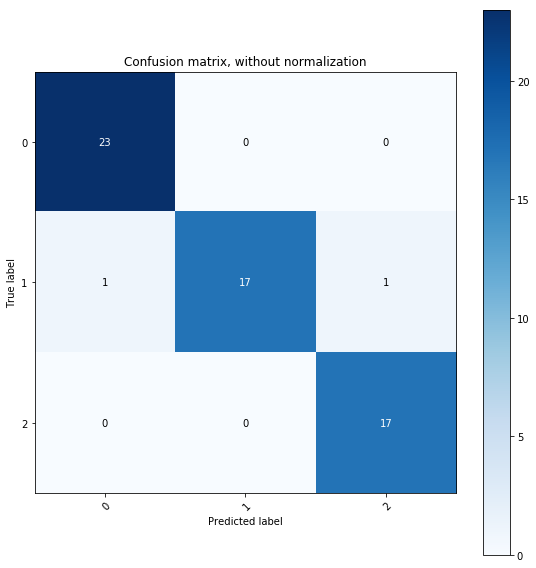

In [11]:
plot_confusion_matrix(y_test,y_test_pred,name="toy_exampe")

In [12]:
get_performance_measures(y_test, y_test_pred)

Total Accuracy 		0.966

Status 						 Precision 	 Recall 	 F1
----------------------------------------------------------------------------------------
0                                                0.958 		 1.000 		 0.979
1                                                1.000 		 0.895 		 0.944
2                                                0.944 		 1.000 		 0.971


## Testing cross validation

In [13]:
## Import the random forest model.
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split


def train_rf_model(X_train,y_train):
    # Random forest model
    rf = RandomForestClassifier(n_estimators=10, random_state=12)

    # Fitting the model
    # rf.fit(X_train, y_train)
    return rf

import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
data = load_wine()


X = pd.DataFrame(data.data, columns = data.feature_names)
y = pd.DataFrame(data.target)
y = np.array(y)
y = np.ravel(y)


rf = train_rf_model(X, y)

In [14]:
df = get_cross_validation_df_OLD(rf,X,y)


\begin{tabular}{lll}
\toprule
precision &    recall &  f1-score \\
\midrule
 0.971825 &  0.967937 &  0.967743 \\
\bottomrule
\end{tabular}



## Smote and cross validation

In [15]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support


def cross_validate_model(clf, X, y, smote=False, convertStatus=False):
    
    # For the confusion matrix 
    y_pred_total = []
    y_true_total = []
    
    # Metrics
    score_array = []
    n_splits = 10
    skf = StratifiedKFold(n_splits=n_splits)

    # MAKE SURE THE X IS A NUMPY ARRAY
    if isinstance(X, pd.DataFrame):
        X = X.values
        

    for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
        X_train = X[train_index]
        y_train = y[train_index]  # Based on your code, you might need a ravel call here, but I would look into how you're generating your y
        X_test = X[test_index]
        y_test = y[test_index]  # See comment on ravel and  y_train
        
        if (smote == True):
            sm = SMOTE(random_state=12)
            X_train, y_train = sm.fit_sample(X_train, y_train)
                
        model = clf  # Choose a model here
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        
        # Adding to total lists
        y_pred_total = y_pred_total + y_pred.tolist()
        y_true_total = y_true_total + y_test.tolist()

        #y_pred_total = y_pred_total + y_pred
        #y_true_total= y_true_total + y_test
        
        # Appending to lists
        if(convertStatus):
            y_test = target_parser.status_to_description(y_test)
            y_pred = target_parser.status_to_description(y_pred)
        
        label_list = unique_labels(y_test)
        
        score_array.append(precision_recall_fscore_support(y_test, y_pred, beta=0.5, average=None,labels=label_list))
        
        
    avg_score = np.mean(score_array,axis=0)
    
    df = pd.DataFrame(avg_score,columns = label_list)
    df.insert(0,'Performance metric',['Precision','Recall','F1-score','Support'])

    print("=============== Paste into Overleaf: ===============")
    print(pandas_to_latex.df_to_latex(df))
    print(" ")
    print("==============================")
    
    return df, y_true_total, y_pred_total, df


#df, y_true, y_pred = cross_validate_model(rf,X,y)
#plot_confusion_matrix(y_true,y_pred,True)
df, y_true_total, y_pred_total = cross_validate_model(rf,X,y)
df

/Users/mortenolsenosvik/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/mortenolsenosvik/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/mortenolsenosvik/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/mortenolsenosvik/anaconda3/lib/python3.7/s

=============== Paste into Overleaf: ===============

\begin{tabular}{lrrr}
\toprule
Performance metric &         0 &         1 &         2 \\
\midrule
         Precision &  0.971429 &  0.960714 &  0.983333 \\
            Recall &  0.966667 &  0.957143 &  0.980000 \\
          F1-score &  0.968778 &  0.958750 &  0.981445 \\
           Support &  5.900000 &  7.100000 &  4.800000 \\
\bottomrule
\end{tabular}

None
 


ValueError: too many values to unpack (expected 3)

In [16]:
from sklearn.model_selection import TimeSeriesSplit

def times_series_split(clf, X, y,smote=False,convertStatus =False):
     
    # For the confusion matrix 
    y_pred_total = []
    y_true_total = []
    
    # Metrics
    score_array = []

    # MAKE SURE THE X IS A NUMPY ARRAY
    if isinstance(X, pd.DataFrame):
        X = X.values
    tscv = TimeSeriesSplit(n_splits=5)

    for train_index, test_index in tscv.split(X):
        # print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        if (smote == True):
            sm = SMOTE(random_state=12)
            X_train, y_train = sm.fit_sample(X_train, y_train)

        model = clf  # Choose a model here
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        
        # Adding to total lists
        y_pred_total = y_pred_total + y_pred.tolist()
        y_true_total = y_true_total + y_test.tolist()

        #y_pred_total = y_pred_total + y_pred
        #y_true_total= y_true_total + y_test
        
        # Appending to lists
        if(convertStatus):
            y_test = target_parser.status_to_description(y_test)
            y_pred = target_parser.status_to_description(y_pred)
        
        label_list = unique_labels(y_test)
        
        score_array.append(precision_recall_fscore_support(y_test, y_pred, beta=0.5, average=None,labels=label_list))
        
        
    avg_score = np.mean(score_array,axis=0)
    
    df = pd.DataFrame(avg_score,columns = label_list)
    df.insert(0,'Performance metric',['Precision','Recall','F1-score','Support'])

    print("=============== Paste into Overleaf: ===============")
    print(pandas_to_latex.df_to_latex(df))
    print(" ")
    print("==============================")
    
    return df, y_true_total, y_pred_total, df

df, y_true_total, y_pred_total,dff = times_series_split(rf,X,y)


=============== Paste into Overleaf: ===============

\begin{tabular}{ll}
\toprule
Performance metric &                                          2 \\
\midrule
         Precision &                  [0.8533844189016602, 0.6] \\
            Recall &    [0.793103448275862, 0.3931034482758621] \\
          F1-score &  [0.6952276765349934, 0.42738332227383324] \\
           Support &                               [24.6, 21.8] \\
\bottomrule
\end{tabular}

None
 


/Users/mortenolsenosvik/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/mortenolsenosvik/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
